# Imports and Constants

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATA_PATH = "data/"
AUTHORS_FILE = os.path.join(DATA_PATH, "authors.csv")
PAPERS_FILE = os.path.join(DATA_PATH, "papers.csv")

# Exploring Data Files

In [3]:
authors = pd.read_csv(AUTHORS_FILE)
papers = pd.read_csv(PAPERS_FILE)

In [4]:
papers.head(5)

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [5]:
authors.head(5)

,Unnamed: 0,source_id,first_name,last_name,institution,unique_ids,paper_unique_id
0,0,27,Alan,Murray,NaN,0,27_1987
1,1,27,Anthony,Smith,NaN,0,27_1987
2,2,27,Zoe,Butler,NaN,0,27_1987
3,3,63,Yaser,Abu-Mostafa,NaN,1,63_1987
4,4,60,Michael,Fleisher,NaN,2,60_1987


## Statistics on Data

Text(0.5, 0, 'Year')

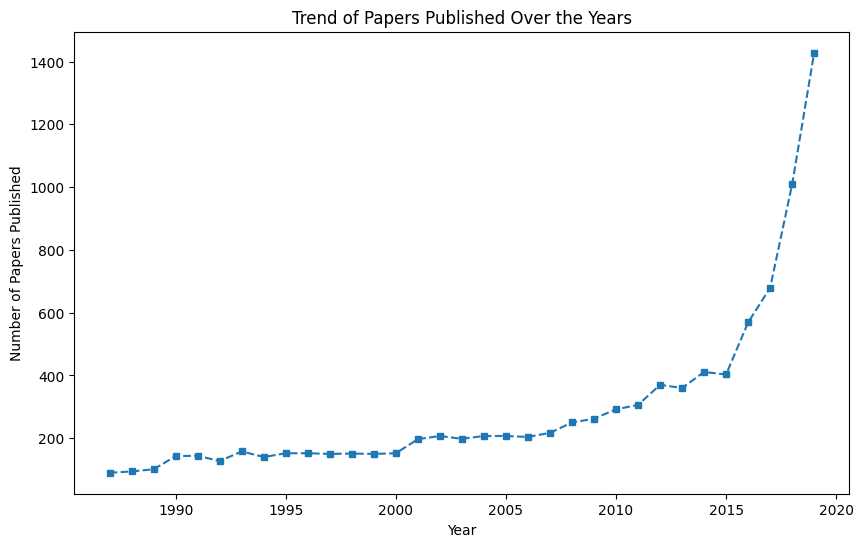

In [6]:
total_per_year = papers[['source_id', 'year']].groupby('year').count()
fig, axs = plt.subplots(figsize=(10, 6))
axs.plot(total_per_year, marker='s', markersize='5', linestyle='dashed')
axs.set_title("Trend of Papers Published Over the Years")
axs.set_ylabel("Number of Papers Published")
axs.set_xlabel("Year")

In [7]:
papers['length_of_title'] = papers['title'].apply(lambda x: len(x.split(" ")))

In [8]:
length_of_paper_title = papers[['source_id', 'length_of_title']].groupby('length_of_title').count()
x_values = [int(x) for x in length_of_paper_title.to_dict()['source_id'].keys()]
y_values = [int(x) for x in length_of_paper_title.to_dict()['source_id'].values()]

Text(0.5, 0, 'Length of Paper Titles')

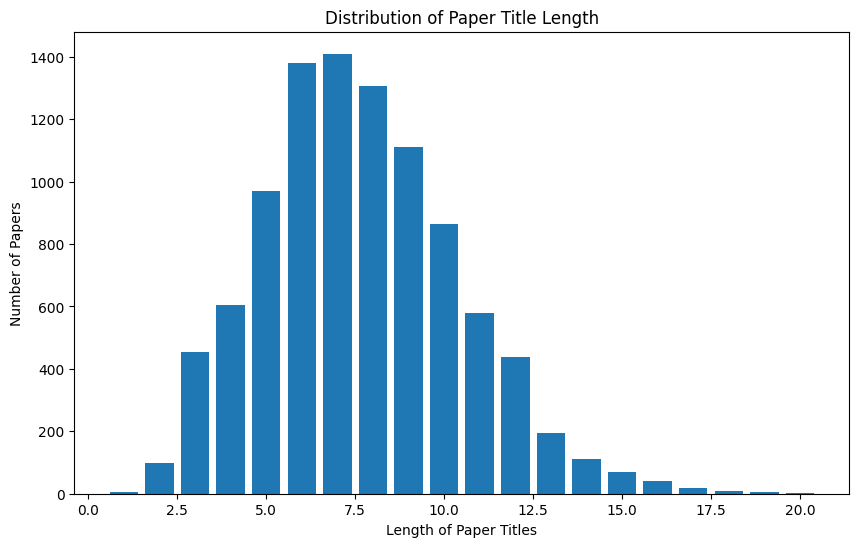

In [9]:
fig, axs = plt.subplots(figsize=(10, 6))
axs.bar(x_values, y_values)
axs.set_title("Distribution of Paper Title Length")
axs.set_ylabel("Number of Papers")
axs.set_xlabel("Length of Paper Titles")

In [10]:
from wordcloud import WordCloud
vocabulary = []
for title in papers['title'].values:
    title_tokens = title.split(" ")
    vocabulary.extend(title_tokens)

wc_vocabulary = " ".join(vocabulary)
# vocabulary = list(set(vocabulary))

In [11]:
len(vocabulary)

74184

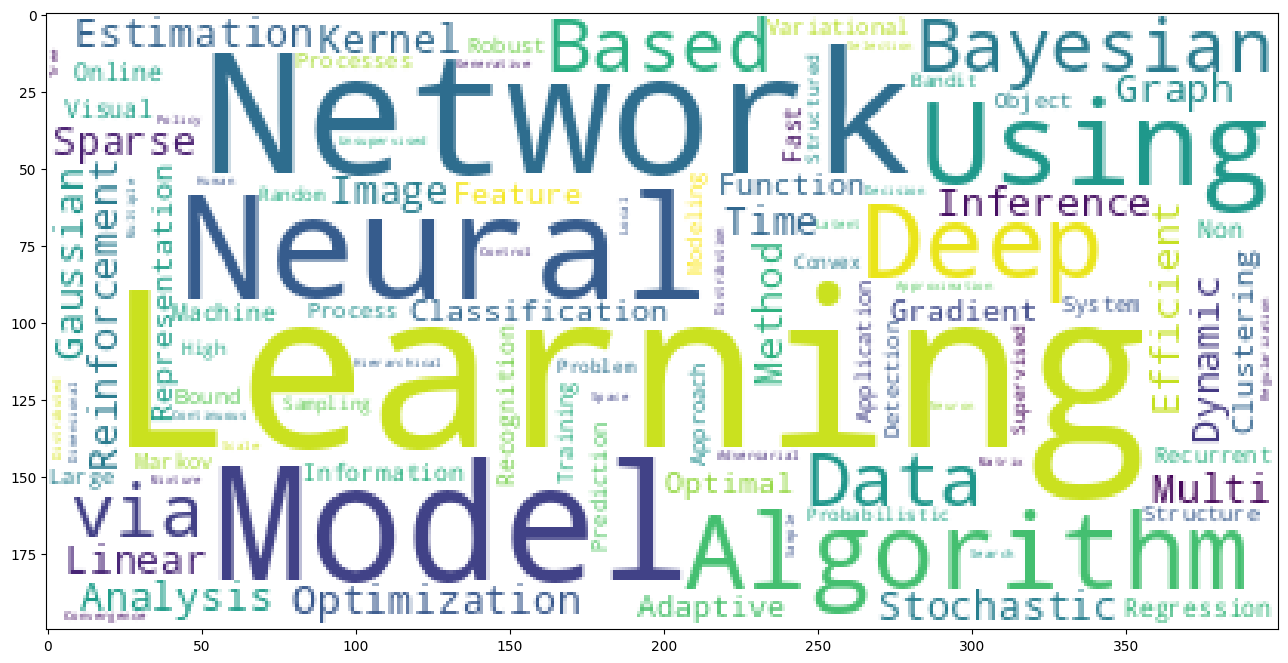

In [12]:
wc = WordCloud(collocations=False, background_color='white').generate(wc_vocabulary)
plt.figure(figsize=(16, 8))
plt.imshow(wc)

# Requesting the application

In [13]:
import json
import pprint
import requests as re

In [14]:
test_server = 'http://localhost:5000'

def call_api(api, method='GET', data=None):
    if method == 'GET':
        resp = re.get(url=test_server+api)
    else:
        resp = re.post(url=test_server+api, 
                       json=json.dumps(data), 
                       headers={'Content-Type': 'application/json'})
    return resp.json()

# sample_query_data = {
#     'query_text': 'Development of natural language processing by the use of audio data.',
#     'query_on': 'abstract'
# }

# # resp = re.post(url=test_server+"/register", json=json.dumps(sample_user_data), headers={'Content-Type': 'application/json'})
# resp = re.post(url=test_server+"/query", json=json.dumps(sample_query_data), headers={'Content-Type': 'application/json'})
# # resp = re.get(url=test_server+'/test_collection')
# pprint.pprint(resp.json())

## Check if the application is working or not

In [15]:
result = call_api("/test")
pprint.pprint(result)

{'data': 'This app is working.', 'status': 200}


## Registering New Paper Data

In [16]:
data = {
    'id': 0,
    'title': "A sample paper title.",
    'abstract': "A sample paper abstract",
    'authors': ["Jon Doe", "Don Joe"],
    'institutions': ["Dunder and Mufflin", "Munder and Dufflin"],
    'publishing_year': 2023
}

result = call_api("/register", 
                  method='POST', 
                  data=data)

pprint.pprint(result)

{'data': 'Successfully registered data.', 'status': 200}


## Querying for papers

In [17]:
data = {
    'query_text': "Sample paper",
    'query_on': "title"
}

result = call_api("/query",
                  method='POST',
                  data=data)

pprint.pprint(result)

{'data': [{'abstract': 'A sample paper abstract',
           'authors': 'Jon Doe,Don Joe',
           'id': '0',
           'institutions': 'Dunder and Mufflin,Munder and Dufflin',
           'publishing_year': 2023,
           'title': 'A sample paper title.'},
          {'abstract': 'Thompson sampling has emerged as an effective '
                       'heuristic for a broad range of online decision '
                       'problems. In its basic form, the algorithm requires '
                       'computing and sampling from a posterior distribution '
                       'over models, which is tractable only for simple '
                       'special cases. This paper develops ensemble sampling, '
                       'which aims to approximate Thompson sampling while '
                       'maintaining tractability even in the face of complex '
                       'models such as neural networks. Ensemble sampling '
                       'dramatically expands on th

In [18]:
data = {
    'query_text': "Sample Paper Abstract",
    'query_on': "abstract"
}

result = call_api("/query",
                  method='POST',
                  data=data)

pprint.pprint(result)


{'data': [{'abstract': 'A sample paper abstract',
           'authors': 'Jon Doe,Don Joe',
           'id': '0',
           'institutions': 'Dunder and Mufflin,Munder and Dufflin',
           'publishing_year': 2023,
           'title': 'A sample paper title.'},
          {'abstract': 'Abstraction has long been a key component in the '
                       'practical solving of large-scale extensive-form games. '
                       'Despite this, abstraction remains poorly understood. '
                       'There have been some recent theoretical results but '
                       'they have been confined to specific assumptions on '
                       'abstraction structure and are specific to various '
                       'disjoint types of abstraction, and specific solution '
                       'concepts, for example, exact Nash equilibria or '
                       'strategies with bounded immediate regret. In this '
                       'paper we present a

## Removing Data

In [19]:
data = {
    'ids': ['0']
}

result = call_api("/delete",
                   method='POST',
                   data=data)

pprint.pprint(result)

{'deleted': True, 'status': 200}
